# Implementação de uma rede neural do tipo MLP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from layers import Dense
from models import Model
from activations import Sigmoid
from losses import MSE
from utils import graphics
from metrics.classification import accuracy

## Carregamento do dataset

In [2]:
raw_dataset = pd.read_csv("arruela_.csv")
raw_dataset.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [3]:
labels = ["Output1", "Output2"]
features = ["NumAmostra", "Area", "Delta"]

Agora separamos os valores de interesse em um novo `DataFrame`. É importante garantir que os dados estejam balanceados para evitar que o modelo adquira algum viés indesejado.

In [4]:
scaler = StandardScaler()
dataset = scaler.fit_transform(raw_dataset[[*labels, *features]])
dataset = pd.DataFrame(dataset, columns=[*labels, *features])

## Análise dos dados

### Balanceamento do dataset

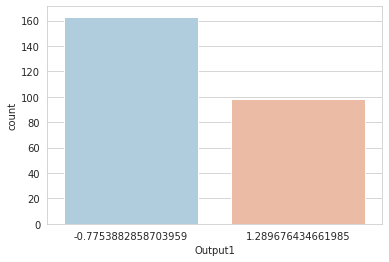

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Output1",data=dataset,palette="RdBu_r")
plt.show()

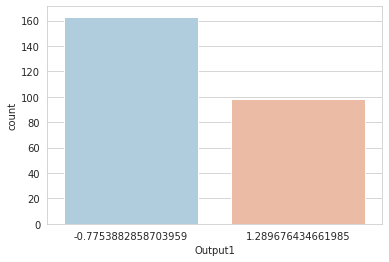

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Output1",data=dataset,palette="RdBu_r")
plt.show()

In [7]:
unique, counts = np.unique(raw_dataset["Output1"], return_counts=True)
dict(zip(unique, counts))

{0: 163, 1: 98}

Como podemos observar, a quantidade de elementos cuja classe é 0 (considerando `Output1`) é maior.

### Relação entre as features

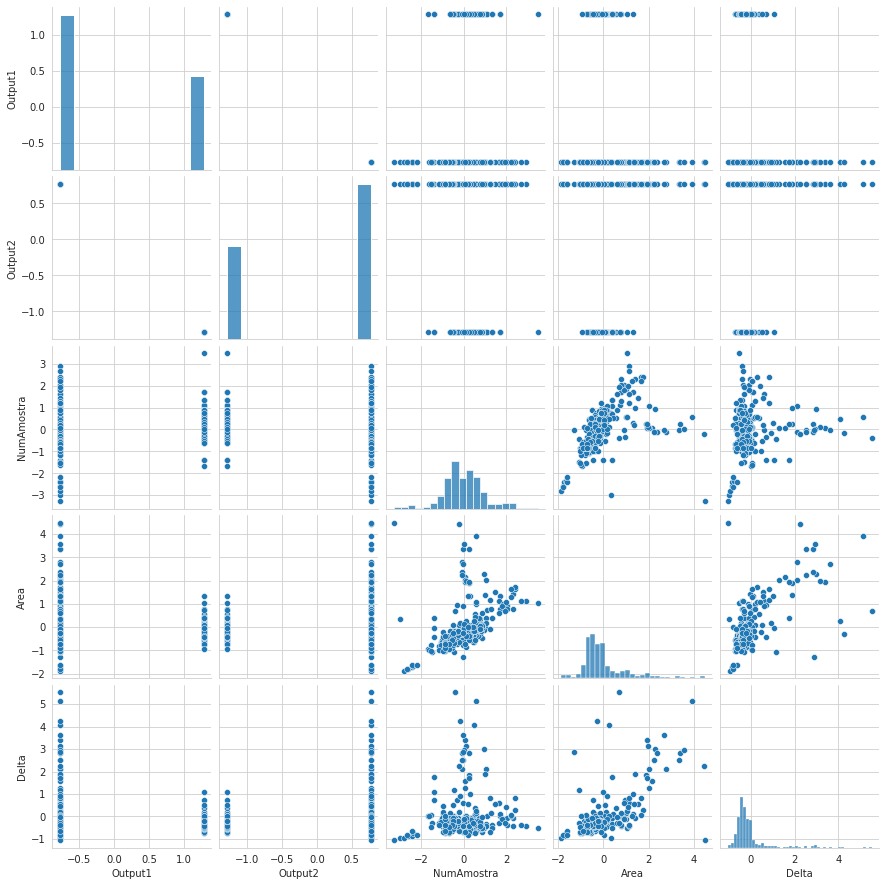

In [8]:
sns.pairplot(dataset)
plt.show()

## Criação do modelo

A organização do modelo foi baseada - de modo grosseiro - no framework Keras. Uma instancia de `Model` representa a rede neural, agrupando camadas, função de custo e loops de treino.

Adicionalmente, é necessário adicionar camadas à um modelo, para que ele possua de fato uma estrutura de pesos. Isto é feito através do método `add_layer` passando para ele uma instancia de `Layer` - atualmente, existe apenas um tipo de camada: `Dense`, que simplesmente computa a função de ativação dos neurônios. O primeiro argumento de `Layer` é o número de entradas da camadas ao passo que o segundo argumento é o número de saídas.

Para treinar um modelo, é necessário especificar uma função de custo através do método `compile`.

Em particular, optou-se por um modelo com a mesma arquitetura sugerida na solução do professor: 3 camadas, com 3, 8 e 2 neurônios respectivamente. Com função de custo sendo a _Mean Squared Error_ (MSE) com ativações do tipo sigmoid nos neurônios.

Utilizou-se 10-fold cross validation com diferentes arquiteturas (apenas para fins acadêmicos). Todos os modelos foram treinados utilizando 2000 épocas com taxa de aprendizagem de 0.01.

Utilizando MSE como função de custo:

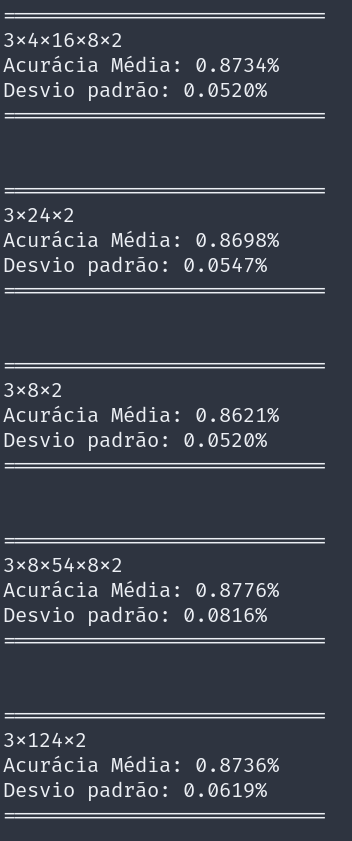

E também utilizando Cross Entropy como função de custo:

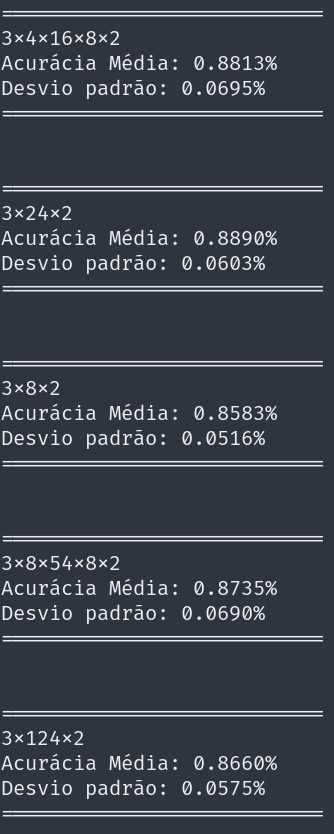

porém, todos os modelos são estatisticamente equivalentes, com 95% de confiança. O código que executou a validação cruzada está disponível no arquivo `main.py`

In [9]:
model = Model()

model.add_layer(Dense(3, 8, activation=Sigmoid()))
model.add_layer(Dense(8, 2, activation=Sigmoid()))

model.compile(loss=MSE())

### Treinamento

Primeiramente, é necessário criar as divisões do conjunto de dados, para treino e teste.

In [10]:
## balanceamento do conjunto de dados
# dataset = dataset.sample(frac=1).reset_index(drop=True)
# raw_dataset = raw_dataset.sample(frac=1).reset_index(drop=True)

# dataset.drop(raw_dataset[raw_dataset["Output1"] == 0].index[:65], inplace=True)
# raw_dataset.drop(raw_dataset[raw_dataset["Output1"] == 0].index[:65], inplace=True)

X = dataset[features].to_numpy()
y = raw_dataset[labels].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.3, random_state=0)

In [11]:
epochs = 10000
learning_rate = 0.01

In [12]:
history = model.train(X_train, y_train, epochs=epochs, learning_rate=learning_rate, verbose=False)

Gráfico da evolução do erro.

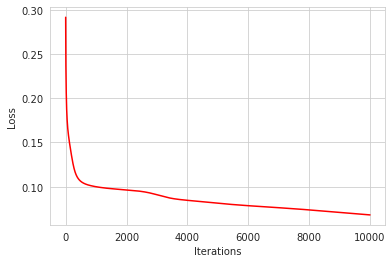

In [13]:
graphics.plot_loss(history)

In [14]:
y_pred = model.predict(X_test)

print("ACC:", accuracy(y_pred, y_test))

ACC: 0.8607594936708861
